# Chapter 4 - Classification

## Exercises

### 10) "Weekly" data set

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model, discriminant_analysis, neighbors, cross_validation
import scipy
from IPython.display import display, HTML

In [2]:
# Read in weekly data
weekly = pd.read_csv("C:/Users/sackettj/Documents/gitProjects/weekly.csv")
display(weekly.head(5))

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [3]:
# Create dummy variable for "Direction" (up = 1, down = 0)
weekly.loc[:, "Intercept"] = 1
weekly.loc[:, "dir"] = pd.get_dummies(weekly.loc[:, "Direction"])["Up"]
display(weekly.head(5))

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Intercept,dir
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down,1,0.0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,1,0.0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,1,1.0
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,1,1.0
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,1,1.0


#### I fit the model with "Up" = 1 and "Down" = 0. The statsmodel package fits no-intercept models by default.

In [4]:
# Investigate Weekly data set
display(weekly.describe())

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Intercept,dir
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.0,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899,1.0,0.555556
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927,0.0,0.497132
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000,1.0,0.000000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000,1.0,0.000000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000,1.0,1.000000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000,1.0,1.000000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000,1.0,1.000000


In [5]:
# Correlation matrix
names = [_ for _ in list(weekly.columns[1:7])]
corr = pd.DataFrame(np.corrcoef(weekly.ix[:, 1:7].T), index = names, columns = names)
display(corr)

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
Lag1,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951
Lag2,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513
Lag3,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288
Lag4,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075
Lag5,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517
Volume,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000


#### There is minimal correlation between the predictors. 

In [6]:
# Fit full logit model
X = weekly.ix[:, [9, 1, 2, 3, 4, 5, 6]]
y = weekly.ix[:, "dir"]
logRegFull = sm.Logit(y, X)
logRegFull = logRegFull.fit()
logRegFull.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    dir   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Mon, 08 Aug 2016   Pseudo R-squ.:                0.006580
Time:                        16:31:39   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
                                        LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002         0.098     0.435
Lag1          -0.0413      0.026     -1.563      0.118        -0.093     0.010
Lag2           0.0584      0.027      2.175      0.030         0.006     0.111
Lag3          -0.0161      0.027     -0.602      0.547        -0.068     0.036
Lag4          -0.0278      0.026     -1.050      0.294        -0.080     0.024
Lag5          -0.0145      0.026     -0.549      0.583        -0.066     0.037
Volume        -0.0227      0.037     -0.616      0.538        -0.095     0.050
==============================================================================
"""

#### Only the "Lag2" feature is statistically significant. 

In [7]:
display(logRegFull.pred_table())
print "Training hit rate: ", sum(np.diag(logRegFull.pred_table())) / sum(sum(logRegFull.pred_table()))

array([[  54.,  430.],
       [  48.,  557.]])

Training hit rate:  0.561065197429


#### Now, partition the data into training (2008 and earlier) and test (2009 and later) sets. Only include the intercept and "Lag2" in the predictor matrix. 

In [8]:
# Fit reduced logit model with "Lag2" as only predictor
weeklyTrain = weekly.ix[weekly["Year"] < 2009, :]
weeklyTest = weekly.ix[weekly["Year"] > 2008, :]
logRegLag2 = sm.Logit(weeklyTrain["dir"], weeklyTrain.loc[:, ["Intercept", "Lag2"]])
resLogit = logRegLag2.fit()
resLogit.summary()

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    dir   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Mon, 08 Aug 2016   Pseudo R-squ.:                0.003076
Time:                        16:31:39   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
                                        LLR p-value:                   0.04123
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.2033      0.064      3.162      0.002         0.077     0.329
Lag2           0.0581      0.029      2.024      0.043         0.002     0.114
==============================================================================
"""

In [9]:
# Variance-covariance matrix
X = np.matrix(weeklyTrain.ix[:, ["Intercept", "Lag2"]])
V = np.matrix(np.zeros(shape = (X.shape[0], X.shape[0])))
np.fill_diagonal(V, resLogit.predict(X) * (1 - resLogit.predict(X)))
covLogit = np.linalg.inv(X.T * V * X)
print covLogit
print np.sqrt(np.diag(covLogit))

[[  4.13196447e-03  -8.50392234e-05]
 [ -8.50392234e-05   8.23946066e-04]]
[ 0.06428036  0.02870446]


#### Compute covariance matrix to verify standard errors

In [10]:
# Score the test data set
dir_pred_logit = np.array([1. if x > 0.5 else 0. for x in resLogit.predict(weeklyTest.ix[:, ["Intercept", "Lag2"]])])
table = pd.crosstab(np.array(weeklyTest["dir"]), np.array(dir_pred_logit))
display(table)
print "Hit rate: ", sum(np.diag(table)).astype("float") / np.shape(weeklyTest)[0]

col_0,0.0,1.0
row_0,,
0.0,9,34
1.0,5,56


Hit rate:  0.625


#### Linear Discriminant Analysis
#### Note: Discriminant analysis and K-nearest neighbor are only available in scikit-learn. 

In [11]:
# Initiate LDA object
lda = discriminant_analysis.LinearDiscriminantAnalysis()

In [12]:
# Fit LDA model, score on test data
resLda = lda.fit(weeklyTrain.ix[:, "Lag2"].reshape(-1,1), weeklyTrain.ix[:, "dir"])
dir_pred_lda = np.array(resLda.predict(weeklyTest.ix[:, "Lag2"].reshape(-1, 1)))
table = pd.crosstab(np.array(weeklyTest["dir"]), dir_pred_lda)
# Print classification rate
display(table)
print "Hit rate, LDA: ", sum(np.diag(table)).astype("float") / np.shape(weeklyTest)[0]

col_0,0.0,1.0
row_0,,
0.0,9,34
1.0,5,56


Hit rate, LDA:  0.625


#### Quadratic Discriminant Analysis

In [13]:
# Initiate QDA object
qda = discriminant_analysis.QuadraticDiscriminantAnalysis()

In [14]:
# Fit QDA model, score on test data
resQda = qda.fit(weeklyTrain.ix[:, "Lag2"].reshape(-1,1), weeklyTrain.ix[:, "dir"])
dir_pred_qda = np.array(resQda.predict(weeklyTest.ix[:, "Lag2"].reshape(-1, 1)))
table = pd.crosstab(np.array(weeklyTest["dir"]), dir_pred_qda)
# Print classification rate
display(table)
print "Hit rate, QDA: ", table.ix[1,1].astype("float") / np.shape(weeklyTest)[0]

col_0,1.0
row_0,
0.0,43
1.0,61


Hit rate, QDA:  0.586538461538


In [15]:
# Levene's test for equal variances
scipy.stats.levene(weeklyTrain.ix[weeklyTrain["dir"] == 0, "Lag2"], weeklyTrain.ix[weeklyTrain["dir"] == 1, "Lag2"])

LeveneResult(statistic=0.78656332113941052, pvalue=0.37535825441522941)

#### NOTE: LDA assumes that the covariance of the input variables is equal across levels of the target variable. Levene's test can be used to check for equal variance. For this sample, there is insufficient evidence to reject the assumption that the variances are equal, and we can therefore safely use LDA rather than QDA. 

In [16]:
# Initiate knn classifier object
knn1 = neighbors.KNeighborsClassifier(n_neighbors = 1)

In [17]:
# Fit LDA model, score on test data
resKnn1 = knn1.fit(weeklyTrain.ix[:, "Lag2"].reshape(-1,1), weeklyTrain.ix[:, "dir"])
dir_pred_knn1 = np.array(resKnn1.predict(weeklyTest.ix[:, "Lag2"].reshape(-1, 1)))
table = pd.crosstab(np.array(weeklyTest["dir"]), dir_pred_knn1)
# Print classification rate
display(table)
print "Hit rate, K = 1: ", sum(np.diag(table)).astype("float") / np.shape(weeklyTest)[0]

col_0,0.0,1.0
row_0,,
0.0,21,22
1.0,31,30


Hit rate, K = 1:  0.490384615385


#### The logistic regression and LDA models have the best tes hit rates.

#### Implementing logistic regression with scikit-learn

In [18]:
 # Initiate logit model object
logit = linear_model.LogisticRegression()

# Fit model
resLogit = logit.fit(weeklyTrain.ix[:, "Lag2"].reshape(-1,1), weeklyTrain.ix[:, "dir"])

# Calculate matrix of predicted class probabilities. 
# Check resLogit.classes_ to make sure that sklearn ordered the classes as expected
predProbs = np.matrix(resLogit.predict_proba(weeklyTest.ix[:, "Lag2"].reshape(-1,1)))

# Design matrix
X = np.matrix(weeklyTrain.ix[:, ["Intercept", "Lag2"]])

# Initiate matrix of 0's, fill diagonal with each predicted observation's variance
V = np.matrix(np.zeros(shape = (X.shape[0], X.shape[0])))
np.fill_diagonal(V, np.multiply(predProbs[:,0], predProbs[:,1]).A1)

# Covariance matrix
covLogit = np.linalg.inv(X.T * V * X)
print "Covariance matrix: ", covLogit

# Standard errors
print "Standard errors: ", np.sqrt(np.diag(covLogit))

# Wald statistic (coefficient / s.e.) ^ 2
logitParams = np.insert(resLogit.coef_, 0, resLogit.intercept_)
print "Wald statistics: ", (logitParams / np.sqrt(np.diag(covLogit))) ** 2

Covariance matrix:  [[ 0.00415642 -0.00010105]
 [-0.00010105  0.00080738]]
Standard errors:  [ 0.06447029  0.02841447]
Wald statistics:  [ 9.85850918  4.17571533]


### 11) "Auto" data set

In [19]:
# Read in data
auto = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', delim_whitespace = True,
                     header = None, names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name'],
                     na_values = "?")
auto = auto.ix[~np.isnan(auto["horsepower"])]
display(auto.head(5))

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [20]:
# Add binary variable "mpg01"
auto.loc[:, "mpg01"] = np.array([1. if x >= auto.loc[:, "mpg"].median() else 0. for x in auto.loc[:, "mpg"]])
auto.loc[:,"Intercept"] = 1
display(auto.head(5))

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01,Intercept
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,0.0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,0.0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,0.0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,0.0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,0.0,1


mpg01,0.0,1.0
cylinders,,
3,3,1
4,20,179
5,1,2
6,72,11
8,100,3


mpg01,0.0,1.0
origin,,
1,173,72
2,14,54
3,9,70


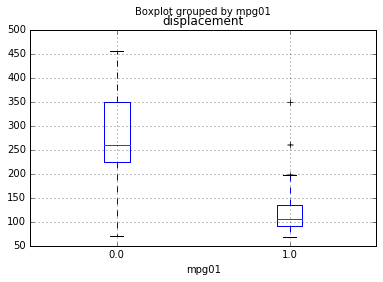

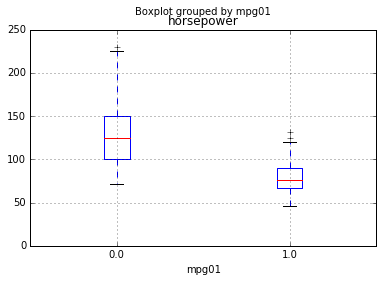

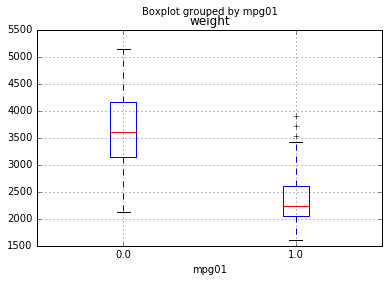

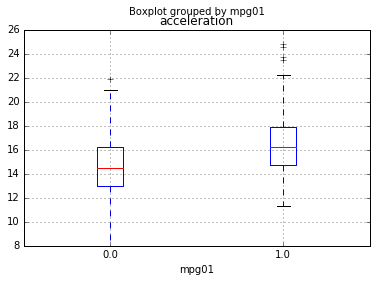

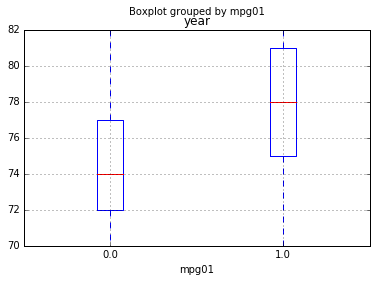

In [21]:
# Boxplots of continuous predictors against mpg01
auto.boxplot(column = "displacement", by = "mpg01")
auto.boxplot(column = "horsepower", by = "mpg01")
auto.boxplot(column = "weight", by = "mpg01")
auto.boxplot(column = "acceleration", by = "mpg01")
auto.boxplot(column = "year", by = "mpg01")

# Contingency tables of ordinal predictors against mpg01
display(pd.crosstab(auto["cylinders"], auto["mpg01"]))
display(pd.crosstab(auto["origin"], auto["mpg01"]))

In [22]:
# Correlation matrix
names = [_ for _ in auto.columns[1:8]]
corr = pd.DataFrame(np.corrcoef(auto.ix[:, 1:8].T), index = names, columns = names)
display(corr)

,cylinders,displacement,horsepower,weight,acceleration,year,origin
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


#### Notice the high degree of multicollinearity among the predictors. 

In [23]:
# Split into training and test set
auto.loc[:, "origin1"] = pd.get_dummies(auto["origin"]).ix[:, 1]
auto.loc[:, "origin2"] = pd.get_dummies(auto["origin"]).ix[:, 2]
X = auto.ix[:, [1,2,3,4,5,6,11,12]]
y = auto.ix[:, "mpg01"]
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.3)

In [24]:
# Initiate LDA object
lda = discriminant_analysis.LinearDiscriminantAnalysis()

In [25]:
# Fit LDA model, score on test data
resLda = lda.fit(X_train, y_train)
predLda = np.array(resLda.predict(X_test))
table = pd.crosstab(np.array(y_test), predLda)
# Print classification rate
display(table)
print "Hit rate, LDA: ", sum(np.diag(table)).astype("float") / np.shape(X_test)[0]

col_0,0.0,1.0
row_0,,
0.0,48,10
1.0,6,54


Hit rate, LDA:  0.864406779661


In [26]:
# Initiate QDA object
qda = discriminant_analysis.QuadraticDiscriminantAnalysis()

In [27]:
# Fit QDA model, score on test data
resQda = qda.fit(X_train, y_train)
predQda = np.array(resQda.predict(X_test))
table = pd.crosstab(np.array(y_test), predQda)
# Print classification rate
display(table)
print "Hit rate, QDA: ", sum(np.diag(table)).astype("float") / np.shape(X_test)[0]

col_0,0.0,1.0
row_0,,
0.0,52,6
1.0,7,53


Hit rate, QDA:  0.889830508475


In [31]:
# Initiate logit object
X_train.loc[:,"Intercept"] = 1
X_designTrain = X_train.loc[:, ["Intercept","weight","year"]]
logit = sm.Logit(y_train, X_designTrain)
resLogit = logit.fit()
resLogit.summary()

Optimization terminated successfully.
         Current function value: 0.187960
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  mpg01   No. Observations:                  274
Model:                          Logit   Df Residuals:                      271
Method:                           MLE   Df Model:                            2
Date:                Mon, 08 Aug 2016   Pseudo R-squ.:                  0.7288
Time:                        16:32:21   Log-Likelihood:                -51.501
converged:                       True   LL-Null:                       -189.92
                                        LLR p-value:                 7.718e-61
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -15.8263      5.709     -2.772      0.006       -27.016    -4.636
weight        -0.0060      0.001     -6.931      0.000        -0.008    -0.004
year           0.4273      0.089      4.780      0.000         0.252     0.603
==============================================================================
"""

In [29]:
# Score the test data set
X_designTest = X_test.ix[:, ["Intercept","weight","year"]]
X_designTest.loc[:,"Intercept"] = 1
predLogit = np.array([1. if x > 0.5 else 0. for x in resLogit.predict(X_designTest)])
table = pd.crosstab(y_test, predLogit)
display(table)
print "Hit rate: ", sum(np.diag(table)).astype("float") / np.shape(X_designTest)[0]

col_0,0.0,1.0
mpg01,,
0.0,53,5
1.0,7,53


Hit rate:  0.898305084746


[[1, 0.80508474576271183], [3, 0.86440677966101698], [5, 0.84745762711864403], [7, 0.83050847457627119], [9, 0.83898305084745761], [11, 0.85593220338983056], [13, 0.85593220338983056], [15, 0.85593220338983056], [17, 0.85593220338983056], [19, 0.85593220338983056], [21, 0.84745762711864403], [23, 0.84745762711864403], [25, 0.84745762711864403], [27, 0.84745762711864403], [29, 0.85593220338983056], [31, 0.85593220338983056], [33, 0.85593220338983056], [35, 0.85593220338983056], [37, 0.86440677966101698], [39, 0.86440677966101698], [41, 0.85593220338983056], [43, 0.83898305084745761], [45, 0.83898305084745761], [47, 0.84745762711864403], [49, 0.83898305084745761]]


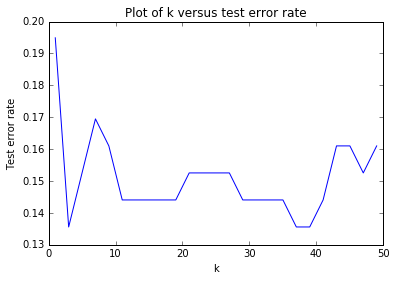

In [30]:
# Loop to test multiple knn classifiers
results = []
for x in range(1, 51, 2):
    knn = neighbors.KNeighborsClassifier(n_neighbors = x)
    knn.fit(X_train.ix[:, ["weight","year"]], y_train)
    predKnn = knn.predict(X_test.ix[:, ["weight", "year"]])
    table = pd.crosstab(y_test, predKnn)
    results.append([x, sum(np.diag(table)).astype("float") / np.shape(X_test)[0]])
print results
plt.plot([a[0] for a in results], [1 - a[1] for a in results])
plt.xlabel("k")
plt.ylabel("Test error rate")
plt.title("Plot of k versus test error rate")
plt.show()